In [29]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [11]:
data = pd.read_csv("walmart.csv")
data = data.drop(columns = "CustomerID")
data["Gender"] = (data["Gender"] == "Male").astype(int)

scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [16]:
sil_score = []
inertia_score = []
for i in range(2, 15):
    kmean = KMeans(n_clusters = i)
    preds = kmean.fit_predict(data)
    
    sil_score.append([i, silhouette_score(data, preds)])
    inertia_score.append([i, kmean.inertia_])
sil_score = np.array(sil_score)
inertia_score = np.array(inertia_score)

Text(0.5, 1.0, 'Silhoette Score')

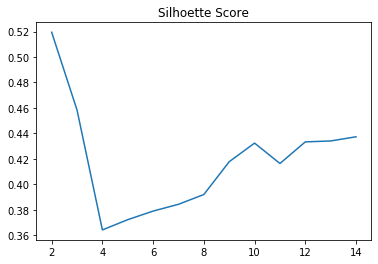

In [18]:
plt.plot(sil_score[:, 0], sil_score[:, 1])
plt.title("Silhoette Score")

Text(0.5, 1.0, 'Inertia')

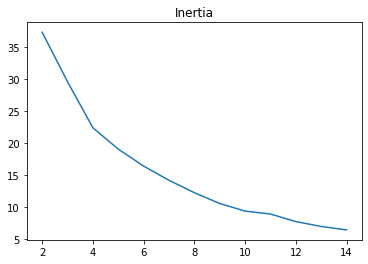

In [19]:
plt.plot(inertia_score[:, 0], inertia_score[:, 1])
plt.title("Inertia")

In [20]:
# wine example

In [21]:
wine = pd.read_csv("white_wine.csv")

In [23]:
wine = pd.DataFrame(data = scaler.fit_transform(wine), columns = wine.columns)

In [27]:
sil_score = []
inertia_score = []
for i in tqdm(range(2, 15)):
    kmean = KMeans(n_clusters = i)
    preds = kmean.fit_predict(wine)
    
    sil_score.append([i, silhouette_score(wine, preds)])
    inertia_score.append([i, kmean.inertia_])
sil_score = np.array(sil_score)
inertia_score = np.array(inertia_score)

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:12<00:00,  1.06it/s]


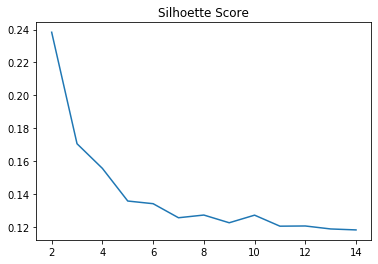

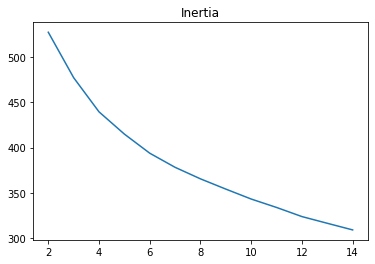

In [28]:
plt.plot(sil_score[:, 0], sil_score[:, 1])
plt.title("Silhoette Score")
plt.show()
plt.plot(inertia_score[:, 0], inertia_score[:, 1])
plt.title("Inertia")
plt.show()

In [34]:
pca = PCA(n_components = 2)
pca_data = pca.fit_transform(wine)

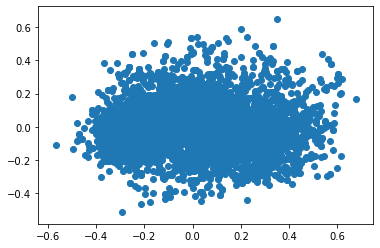

In [37]:
plt.scatter(pca_data[:,0], pca_data[:,1])